# ОПРЕДЕЛЕНИЕ ПЕРСПЕКТИВНОГО ТАРИФА ДЛЯ ТЕЛЕКОМ КОМПАНИИ

## Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. <br>Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов.<br> В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов
### Тариф «Смарт»  

* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  

*Стоимость услуг сверх тарифного пакета:*
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей  

### Тариф «Ультра»  

* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  

*Стоимость услуг сверх тарифного пакета:*
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

# Первый взгляд на данные

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [ ]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

### Таблица users (информация о пользователях):
* **user_id** — уникальный идентификатор пользователя
* **age** — возраст пользователя (годы)
* **churn_date** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* **city** — город проживания пользователя
* **first_name** — имя пользователя
* **last_name** — фамилия пользователя
* **reg_date** — дата подключения тарифа (день, месяц, год)
* **tariff** — название тарифного плана

In [ ]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [ ]:
data_users.duplicated().sum()

0

### Таблица calls (информация о звонках):
* **id** — уникальный номер звонка
* **call_date** — дата звонка
* **duration** — длительность звонка в минутах
* **user_id** — идентификатор пользователя, сделавшего звонок

In [ ]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [ ]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [ ]:
data_calls.duplicated().sum()

0

In [ ]:
len(data_calls[data_calls['duration'] == 0.0])

39613

### Таблица internet (информация об интернет-сессиях):
* **id** — уникальный номер сессии
* **mb_used** — объём потраченного за сессию интернет-трафика (в мегабайтах)
* **session_date** — дата интернет-сессии
* **user_id** — идентификатор пользователя

In [ ]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [ ]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [ ]:
data_internet.duplicated().sum()

0

In [ ]:
len(data_internet[data_internet['mb_used'] == 0.0])

19598

### Таблица messages (информация о сообщениях):
* **id** — уникальный номер сообщения
* **message_date** — дата сообщения
* **user_id** — идентификатор пользователя, отправившего сообщение

In [ ]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [ ]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [ ]:
data_messages.duplicated().sum()

0

### Таблица tariffs (информация о тарифах):
* **messages_included** — количество сообщений в месяц, включённых в абонентскую плату
* **mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* **minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату
* **rub_monthly_fee** — ежемесячная абонентская плата в рублях
* **rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
* **rub_per_message** — стоимость отправки сообщения сверх тарифного пакета
* **rub_per_minute** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* **tariff_name**  — название тарифа


In [ ]:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


## Замечания


1. Необходимо удалить лишний столбец 'Unnamed: 0' в таблице 'data_internet';
2. Изменить тип данных 'object' на 'datetime' везде, где встречается дата;
3. Большое количество 0 в значениях продолжительности вызова и количества использованных Мб. <font color=darkblue>(0 в значениях продолжительности вызова могут быть связаны с тем, что это не состоявшиеся вызовы (номер был занят и т.д.), 0 в значениях количества использованных Мб трафика интернета могут быть связаны с тем, что клиент не пользовался интернетом в этот день)</font>
4. Необходимо округлить значения продолжительности вызова и использованных Мб вверх, как делает это оператор.

# Подготовка данных

In [ ]:
# Замена типа данных

data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y.%m.%d')
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y.%m.%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y.%m.%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y.%m.%d')

In [ ]:
# Удаление ненужного столбца 

data_internet.drop(['Unnamed: 0'], axis = 'columns', inplace = True)

In [ ]:
# Округление значений вверх

data_calls['duration'] = np.ceil(data_calls['duration'])
data_internet['mb_used'] = np.ceil(data_internet['mb_used'])

In [ ]:
data_calls['duration'].head()

0     0.0
1     0.0
2     3.0
3    14.0
4     6.0
Name: duration, dtype: float64

In [ ]:
data_internet['mb_used'].head()

0     113.0
1    1053.0
2    1198.0
3     551.0
4     303.0
Name: mb_used, dtype: float64

In [ ]:
# Удалим звонки продолжительностью 0 секунд

data_calls = data_calls.query('duration != 0')

In [ ]:
len(data_calls[data_calls['duration'] == 0.0])

0

In [ ]:
# Удалим 0 в значениях количетсва использованных Мб интренет трафика

data_internet = data_internet.query('mb_used != 0')

In [ ]:
len(data_internet[data_internet['mb_used'] == 0.0])

0

### Количество сделанных звонков и израсходованных минут разговора по месяцам для каждого клиента

Для подсчета количества сделанных звонков и израсходованных минут разговора по месяцам для каждого клиента необходимо создать сводную таблицу с клиентами, их звонками и месяцами, когда был совершен звонок. Для добавления в сводную таблицу месяца создадим новый столбец в таблице, где будет записан только месяц.

In [ ]:
data_calls.head()

,id,call_date,duration,user_id
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
7,1000_7,2018-08-22,19.0,1000
8,1000_8,2018-09-15,19.0,1000


In [ ]:
data_calls['month'] = data_calls['call_date'].dt.month
data_messages['month'] = data_messages['message_date'].dt.month
data_internet['month'] = data_internet['session_date'].dt.month

In [ ]:
#pivot_calls = data_calls.pivot_table(index=['user_id','month'], values=['id','duration'], aggfunc=({'id':'count','duration':'sum'}))
#pivot_calls

In [ ]:
pivot_calls_duration = data_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc='sum')
pivot_calls_duration

duration
user_id month          
1000    5         159.0
        6         172.0
        7         340.0
        8         408.0
        9         466.0
...                 ...
1498    10        247.0
1499    9          70.0
        10        449.0
        11        612.0
        12        492.0

[3168 rows x 1 columns]

Получили сводную таблицу количества израсходованных минут по месяцам для каждого клиента.

In [ ]:
pivot_calls_count = data_calls.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
pivot_calls_count

id
user_id month    
1000    5      17
        6      28
        7      41
        8      42
        9      46
...            ..
1498    10     30
1499    9       8
        10     44
        11     62
        12     56

[3168 rows x 1 columns]

Получили сводную таблицу количества звонков по месяцам для каждого клиента.

### Количество отправленных сообщений по месяцам

In [ ]:
pivot_messages = data_messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
pivot_messages

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

Получили сводную таблицу количества отправленных сообщений по месяцам каждого клиента.

### Объем израсходованного интернет-трафика по месяцам


In [ ]:
pivot_internet = data_internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
pivot_internet

mb_used
user_id month         
1000    5       2256.0
        6      23257.0
        7      14016.0
        8      14070.0
        9      14581.0
...                ...
1498    10     20604.0
1499    9       1848.0
        10     17809.0
        11     17984.0
        12     13077.0

[3201 rows x 1 columns]

Получили сводную таблицу израсходованного интренет-трафика по месяцам для каждого клиента.

### Помесячная выручка с каждого пользователя

Для того чтобы посчитать помесячную выручку с каждого пользователся необходимо объединить все сводные таблицы и столбец с названием тарифа из таблицы data_users в одну, посчитать для каждого пользователя сумму оплаченную сверх тарифа и сложить ее с ценой самого тарифа.  

Таблица pivot_internet  самая большая, так что присоединять будем к ней с помощью внешнего типа слияния, чтобы все клиенты пользовавшиеся хотя бы чем-то одним (звонки, сообщения, интернет) точно попали в таблицу.

In [ ]:
total_data = (pivot_internet
              .merge(pivot_calls_duration, on=['user_id','month'], how='outer')
              .merge(pivot_messages, on=['user_id','month'], how='outer')
              .reset_index()
              .merge(data_users[['user_id','tariff','city']], on='user_id', how='outer' )
              )
total_data

,user_id,month,mb_used,duration,id,tariff,city
0,1000,5.0,2256.0,159.0,22.0,ultra,Краснодар
1,1000,6.0,23257.0,172.0,60.0,ultra,Краснодар
2,1000,7.0,14016.0,340.0,75.0,ultra,Краснодар
3,1000,8.0,14070.0,408.0,81.0,ultra,Краснодар
4,1000,9.0,14581.0,466.0,57.0,ultra,Краснодар
...,...,...,...,...,...,...,...
3211,1273,10.0,NaN,315.0,35.0,ultra,Курган
3212,1273,11.0,NaN,272.0,29.0,ultra,Курган
3213,1273,12.0,NaN,260.0,39.0,ultra,Курган
3214,1128,NaN,NaN,NaN,NaN,ultra,Волжский


In [ ]:
# Для удобства переименуем столбец id в messages

total_data.rename(columns={'id': 'messages'}, inplace=True)

In [ ]:
total_data

,user_id,month,mb_used,duration,messages,tariff,city
0,1000,5.0,2256.0,159.0,22.0,ultra,Краснодар
1,1000,6.0,23257.0,172.0,60.0,ultra,Краснодар
2,1000,7.0,14016.0,340.0,75.0,ultra,Краснодар
3,1000,8.0,14070.0,408.0,81.0,ultra,Краснодар
4,1000,9.0,14581.0,466.0,57.0,ultra,Краснодар
...,...,...,...,...,...,...,...
3211,1273,10.0,NaN,315.0,35.0,ultra,Курган
3212,1273,11.0,NaN,272.0,29.0,ultra,Курган
3213,1273,12.0,NaN,260.0,39.0,ultra,Курган
3214,1128,NaN,NaN,NaN,NaN,ultra,Волжский


---

Напишем функцию, которая будет подсчитывать выручку с каждого клиента.

In [ ]:
def revenue_per_user(row):
    extra_minutes = 0
    extra_messages = 0
    extra_mb = 0
    if row['tariff'] == 'smart':
        if row['mb_used'] > 15*1024:
            extra_mb = row['mb_used'] - 15*1024
        if row['duration'] > 500:
            extra_minutes = row['duration'] - 500
        if row['messages'] > 50:
            extra_messages = row['messages'] - 50
        smart_result = 550 + np.ceil(extra_mb / 1024) * 200 + extra_minutes * 3 + extra_messages * 3
        return smart_result
    elif row['tariff'] == 'ultra':
        if row['mb_used'] > 30*1024:
            extra_mb = row['mb_used'] - 30*1024
        if row['duration'] > 3000:
            extra_minutes = row['duration'] - 3000
        if row['messages'] > 1000:
            extra_messages = row['messages'] - 1000
        smart_result = 1950 + np.ceil(extra_mb / 1024) * 150 + extra_minutes + extra_messages 
        return smart_result 

<div class="alert alert-warning">
<h2> Комментарий от ревьюера</h2>

Когда ты вписываешь условия тарифа вручную можно ошибиться, так же это не удобно, если условия тарифа изменяться. У тебя есть исходная таблица с уловиями тарифов, можно ее использовать как словарь внутри функции. Либо с помощью объединения подтянуть условия по тарифу в итоговую сводную таблицу, и внутри функции работать с одной строкой.

</div>

In [ ]:
total_data['total_cost'] = total_data.apply(revenue_per_user, axis = 1)

In [ ]:
total_data.head(20)

,user_id,month,mb_used,duration,messages,tariff,city,total_cost
0,1000,5.0,2256.0,159.0,22.0,ultra,Краснодар,1950.0
1,1000,6.0,23257.0,172.0,60.0,ultra,Краснодар,1950.0
2,1000,7.0,14016.0,340.0,75.0,ultra,Краснодар,1950.0
3,1000,8.0,14070.0,408.0,81.0,ultra,Краснодар,1950.0
4,1000,9.0,14581.0,466.0,57.0,ultra,Краснодар,1950.0
5,1000,10.0,14717.0,350.0,73.0,ultra,Краснодар,1950.0
6,1000,11.0,14768.0,338.0,58.0,ultra,Краснодар,1950.0
7,1000,12.0,9827.0,333.0,70.0,ultra,Краснодар,1950.0
8,1001,11.0,18452.0,430.0,NaN,smart,Москва,1350.0
9,1001,12.0,14053.0,414.0,NaN,smart,Москва,550.0


Подсчитали выручку с каждого клиента по месяцам.

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px">  По видимому пропуски появились при левом слиянии таблиц, то есть пользователь пользовался допустим только интернет-трафиком, но не отправил ни одного сообщения за месяц.</div>


# Анализ данных

Для начала подсчитаем суммарную выручку и количество клиентов на каждом тарифе.

In [ ]:
sum_total_cost_smart = total_data.query('tariff == "smart"')['total_cost'].sum()
mean_total_cost_smart = total_data.query('tariff == "smart"')['total_cost'].mean()
count_smart = total_data.query('tariff == "smart"')['user_id'].count()
count_customer_smart = data_users.query('tariff == "smart"')['user_id'].count()
print('Суммарная выручка с клиентов тарифа "Смарт" = ', sum_total_cost_smart )
print('Средняя выручка с клиента тарифа "Смарт" = ', mean_total_cost_smart )
print('Общее количество операций клиентов тарифа "Смарт" = ', count_smart )
print('Количество клиентов тарифа "Смарт" = ', count_customer_smart )
print(' ')
sum_total_cost_ultra = total_data.query('tariff == "ultra"')['total_cost'].sum()
mean_total_cost_ultra = total_data.query('tariff == "ultra"')['total_cost'].mean()
count_ultra = total_data.query('tariff == "ultra"')['user_id'].count()
count_customer_ultra = data_users.query('tariff == "ultra"')['user_id'].count()
print('Суммарная выручка с клиентов тарифа "Ультра" = ', sum_total_cost_ultra )
print('Средняя выручка с клиента тарифа "Ультра" = ', mean_total_cost_ultra )
print('Общее количество операций клиентов тарифа "Ультра" = ', count_ultra)
print('Количество клиентов тарифа "Ультра" = ', count_customer_ultra)

Суммарная выручка с клиентов тарифа "Смарт" =  2886301.0
Средняя выручка с клиента тарифа "Смарт" =  1294.3053811659192
Общее количество операций клиентов тарифа "Смарт" =  2230
Количество клиентов тарифа "Смарт" =  351
 
Суммарная выручка с клиентов тарифа "Ультра" =  2041950.0
Средняя выручка с клиента тарифа "Ультра" =  2070.943204868154
Общее количество операций клиентов тарифа "Ультра" =  986
Количество клиентов тарифа "Ультра" =  149


Для анализа данных напишем функцию, которая будет высчитывать среднее значение, диспресию и страндартное отклонение для каждого параметра тарифа и строить гистограмму.

In [ ]:
def analysis(ftariff1, ftariff2, fparam, fbins):
    current_data_smart = total_data.query('tariff == @ftariff1')
    current_data_ultra = total_data.query('tariff == @ftariff2')
    ax = current_data_smart[fparam].plot(kind='hist', histtype='step', bins=fbins, label='smart', linewidth=5, alpha=0.7, legend=True, figsize=(10,5))
    current_data_ultra[fparam].plot(kind='hist', histtype='step', bins=fbins, label='ultra', linewidth=5, alpha=0.7, ax=ax, grid=True, legend=True, figsize=(10,5))
    
    plt.xlabel(fparam)
    plt.ylabel('users')
    mean_value_smart = current_data_smart[fparam].mean()
    var_smart = current_data_smart[fparam].var()
    dev_smart = np.sqrt(var_smart)
    print('Среднее значение для тарифа "Смарт":', mean_value_smart)
    print('Дисперсия для тарифа "Смарт":', var_smart)
    print('Стандартное отклонение для тарифа "Смарт":', dev_smart)
    
    print(' ')
    
    mean_value_ultra = current_data_ultra[fparam].mean()
    var_ultra = current_data_ultra[fparam].var()
    dev_ultra = np.sqrt(var_ultra)
    print('Среднее значение для тарифа "Ультра":', mean_value_ultra)
    print('Дисперсия для тарифа "Ультра":', var_ultra)
    print('Стандартное отклонение для тарифа "Ультра":', dev_ultra)

Среднее значение для тарифа "Смарт": 419.4403421882035
Дисперсия для тарифа "Смарт": 35718.128533936906
Стандартное отклонение для тарифа "Смарт": 188.99240337626512
 
Среднее значение для тарифа "Ультра": 547.7550158394931
Дисперсия для тарифа "Ультра": 93338.42829141095
Стандартное отклонение для тарифа "Ультра": 305.5133847991131


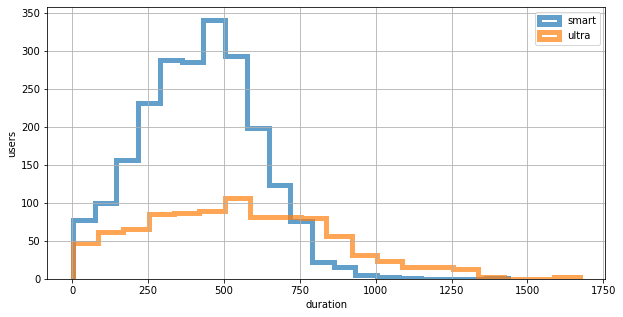

In [ ]:
analysis('smart', 'ultra', 'duration', 20)

* На гистограмме видно, что пик  тарифа Смарт приходится на 500 минут, что является лимитом минут включенных в тариф. Многие используют болше 500 минут разговора, так что можно сделать вывод, что пользователям тарифа Смарт не хватает включенных минут. Так как распределение нормальное, то по правилу 3-х сигм для того чтобы удовлетворить 99% процентов пользоватлей тарифа Смарт им необходимо предоставить **983** минуты разговоров.  


* В среднем пользователи тарифа Ультра тратят около 550 минут и ни один пользователь не добирался до лимита тарифа в 3000 минут. Так как распределение нормальное, то по правилу 3-х сигм можно сделать вывод, что при среднем в 550 минут и страдартном отклонении в 305 минут 99% пользователей хватит **1465** минут, но можно и окргулить до 1500.

---

Среднее значение для тарифа "Смарт": 38.71644120707596
Дисперсия для тарифа "Смарт": 717.5942011753547
Стандартное отклонение для тарифа "Смарт": 26.787948804926344
 
Среднее значение для тарифа "Ультра": 61.161006289308176
Дисперсия для тарифа "Ультра": 2109.6591828651995
Стандартное отклонение для тарифа "Ультра": 45.93102636416042


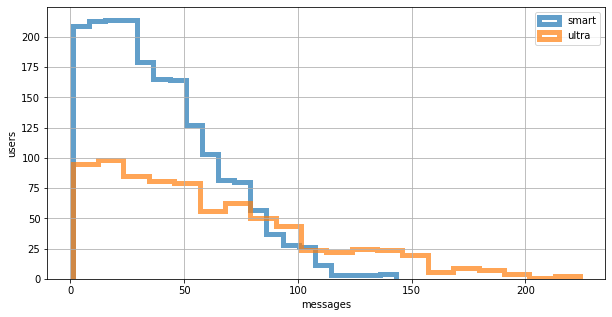

In [ ]:
analysis('smart', 'ultra','messages', 20)

* В среднем пользователи тарифа Смарт отправляют около 40 сообщений в месяц, однако есть и те, кому не хватает лимита тарифа в 50 сообщений и им приходится платить за них сверх тарифа.

* Для пользователей тарифа Ультра лимит в 1000 сообщений в месяц опять же оказался слишком большим, никто не отправляет больше 250 сообщений.

Графики имеют распределение Пуассона.

---

Среднее значение для тарифа "Смарт": 16243.763358778626
Дисперсия для тарифа "Смарт": 34340091.55358943
Стандартное отклонение для тарифа "Смарт": 5860.041941282454
 
Среднее значение для тарифа "Ультра": 19706.979466119097
Дисперсия для тарифа "Ультра": 98746498.93277423
Стандартное отклонение для тарифа "Ультра": 9937.127297804644


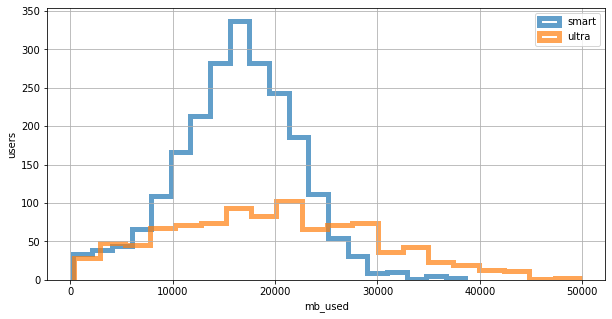

In [ ]:
analysis('smart', 'ultra', 'mb_used', 20)

* В среднем клиенты тарифа Смарт трятят чуть больше 15ГБ интернет-трафика, но так как оператор окргуляет все значения вверх, то выходит, что большинству не хватает 15ГБ и им приходится платить сверх своего тарифа. Так как распределение велечин нормальное, то можно примениьт правило 3-х сигм и сдлеать вывод, что при стандартом отклонении 5860Мб и среднем значении 16243Мб 99% пользователей тарифа Смарт хватит **33Гб** интренет-трафика.  


* Клиенты тарифа Ультра также не укладывются в свой лимит в 30Гб. Для удовлетворения 99% пользователей этого тарифа необходимо установить лимит в **48Гб**.

In [ ]:
total_data.query('tariff == "ultra"').describe()

,user_id,month,mb_used,duration,messages,total_cost
count,986.000000,985.000000,974.000000,947.000000,795.000000,986.000000
mean,1262.957404,8.250761,19706.979466,547.755016,61.161006,2070.943205
std,140.689268,2.871762,9937.127298,305.513385,45.931026,378.629673
min,1000.000000,1.000000,366.000000,1.000000,1.000000,1950.000000
25%,1143.000000,6.000000,12073.750000,311.000000,24.000000,1950.000000
50%,1277.000000,9.000000,19427.500000,529.000000,51.000000,1950.000000
75%,1381.000000,11.000000,26936.250000,758.000000,87.500000,1950.000000
max,1495.000000,12.000000,49789.000000,1673.000000,224.000000,4800.000000


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> Тариф ультра имеет такое большое стандартное отклонение, потому что его значения более неоднороды и имеют больший размах. </div>

Среднее значение для тарифа "Смарт": 1294.3053811659192
Дисперсия для тарифа "Смарт": 673877.6236139194
Стандартное отклонение для тарифа "Смарт": 820.9004955619891
 
Среднее значение для тарифа "Ультра": 2070.943204868154
Дисперсия для тарифа "Ультра": 143360.42925834787
Стандартное отклонение для тарифа "Ультра": 378.6296729765747


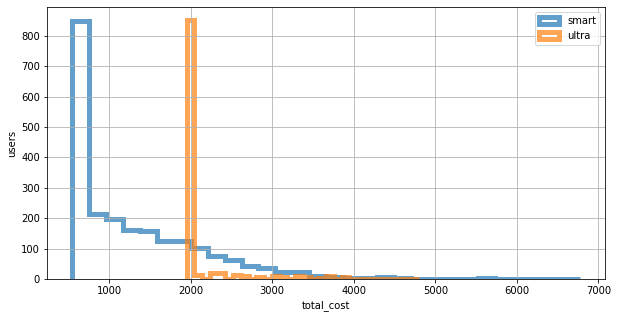

In [ ]:
analysis('smart', 'ultra', 'total_cost', 30)

* В среднем пользователи тарифа Смарт переплачивают по тарифу более чем в 2 раза

* Клиенты тарифа Ультра тоже переплачивают, но далеко не так много, как клиенты Смарт.

In [ ]:
def analysis2(ftariff1, ftariff2, fparam, name):
    dependence_month_smart = total_data.query('tariff == @ftariff1')
    dependence_month_ultra = total_data.query('tariff == @ftariff2')
    ax = dependence_month_smart.groupby('month').agg({fparam:'mean'}).plot( y=fparam, kind='bar', grid=True, legend=True, label='smart', figsize=(10,5), alpha=0.8)
    dependence_month_ultra.groupby('month').agg({fparam:'mean'}).plot(y=fparam, kind='bar',label='ultra', color='orange', ax=ax, grid=True, legend=True, figsize=(10,5), alpha=0.5, title=name)
    plt.show() 

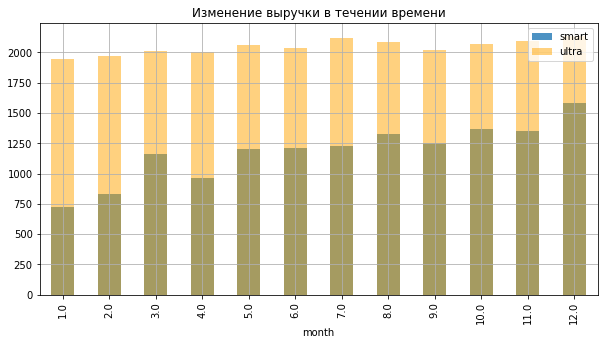

In [ ]:
analysis2('smart', 'ultra', 'total_cost','Изменение выручки в течении времени')

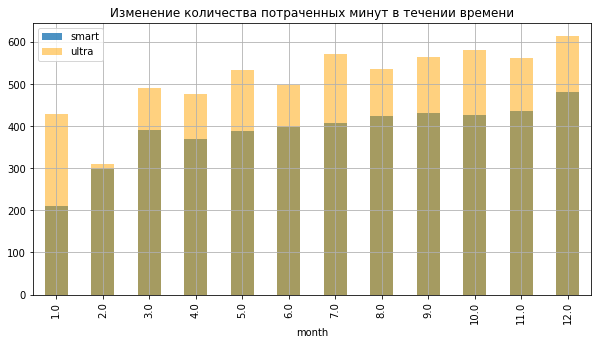

In [ ]:
analysis2('smart', 'ultra', 'duration','Изменение количества потраченных минут в течении времени')

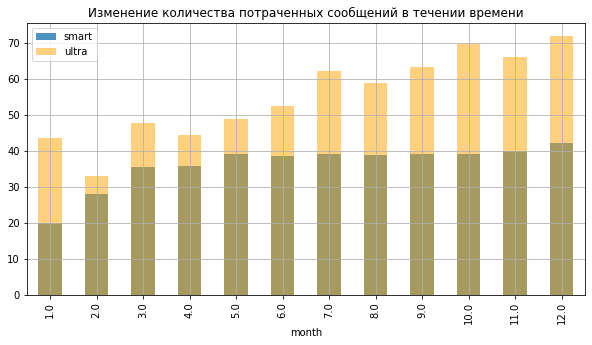

In [ ]:
analysis2('smart', 'ultra', 'messages','Изменение количества потраченных сообщений в течении времени')

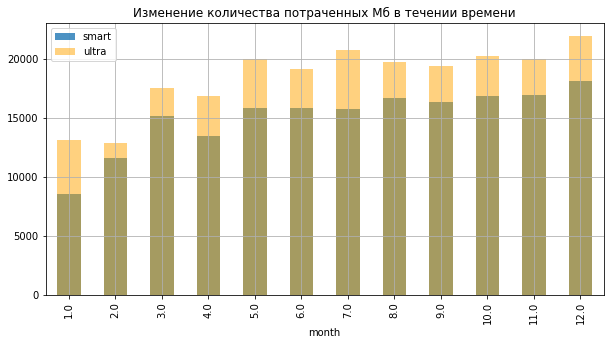

In [ ]:
analysis2('smart', 'ultra', 'mb_used','Изменение количества потраченных Мб в течении времени')

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> Анализ значений по временной динамике показывает, что месяц не особо влияет на изучаемые значения, да, к концу года показатели растут, но незначительно. </div>

# Проверка гипотез

Чтобы проверить гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод scipy.stats.ttest_ind (array1, array2, equal_var). 

**H0** - средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.  

**H1** - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> Сравиним диспресии выборок </div>

In [ ]:
print('Дисперсия выборки клиентов тарифа Смарт', total_data.query('tariff == "smart"')['total_cost'].var())

Дисперсия выборки клиентов тарифа Смарт 673877.6236139194


In [ ]:
print('Дисперсия выборки клиентов тарифа Ультра', total_data.query('tariff == "ultra"')['total_cost'].var())

Дисперсия выборки клиентов тарифа Ультра 143360.42925834787


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> Диспресии не равны, значит необходимо использовать параметр equal_var = False </div>

In [ ]:
smart_customers = total_data.query('tariff == "smart"')['total_cost']
ultra_customers = total_data.query('tariff == "ultra"')['total_cost']
results = st.ttest_ind(ultra_customers, smart_customers, equal_var = False)
alpha = .05
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.2414049931248697e-246
Отвергаем нулевую гипотезу


**Нулевая гипотеза отвергнута**, значит средняя выручка пользователей тарифов «Ультра» и «Смарт» все же **различается**.

---

**H0** - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. 

**H1** - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> Сравиним диспресии выборок </div>

In [ ]:
print('Дисспрессия выборки клиентов их Москвы', total_data.query('city == "Москва"')['total_cost'].var())

Дисспрессия выборки клиентов их Москвы 566183.0292184273


In [ ]:
print('Диспресия выборки клиентов из других регионов', total_data.query('city != "Москва"')['total_cost'].var())

Диспресия выборки клиентов из других регионов 656697.9582266762


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> Диспресии не равны, значит необходимо использовать параметр equal_var = False </div>

In [ ]:
moscow_customer = total_data.query('city == "Москва"')['total_cost']
other_customer = total_data.query('city != "Москва"')['total_cost']
results = st.ttest_ind(moscow_customer, other_customer, equal_var = False)
alpha = .05
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5086199993481282
Не получилось отвергнуть нулевую гипотезу


**Нулевая гепотеза не отвергнута**, а значит средняя выручка пользователей из Москвы не сильно то и отличается от выручки пользователей из других регионов.

---
# Вывод

В ходе анализа тарифов "Смрат" и "Ультра" оператора мобильной связи "Мегалайн" были сделаны следующие выводы:
1. Пользователей тарифа "Смарт" в два раза больше, чем пользователей тарифа "Ультра";  
2. Не смотря на большое различие в количестве пользователей тариф "Ультра" принес выручку приблизительно равную выручке с тарифа "Смарт", из чего можно сделать вывод, что тариф "Ультра" более прибыльный для оператора;  
3. Пользователям тарифа "Смарт" не хватает минут и Гб включенных в тариф и им чаще приходится платить за них сверх тарифного пакета;
4. Пользователям тарифа "Ультра" не хватает только Гб, при этом минут и сообщений включенных в тарифный пакет оказалось слишком много, практически никто не добирался до их лимита. Возможно стоило бы сократить количестов минут и сообщений, при этом увеличить Гб. <font color=darkblue> (Оптимальнымы были бы следующие условия: 1500 минут разговора, 250 сообщений, 50Гб интернет-трафика)</font>
5. Средняя выручка пользователей из Москвы не сильно отличается от выручки пользователей из других регионов.
